# Third Test Evaluation

In [1]:
#imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#tile and screen size lists
tileSizes = [8, 16, 32, 64]
screenSizes = ['800x600', '1024x768', '1920x1080', '3840x2160']

In [3]:
#read data
labels = ['tile size','screen size','frame id 1','tiles frame 1','frame id 2','tiles frame 2', 'common tiles']
data = {
    "sponza" : pd.read_csv("ThirdTest\ThirdTestSponza.csv",names =  labels),
    "lostEmpire" : pd.read_csv("ThirdTest\ThirdTestLostEmpire.csv",names =  labels)
}

In [4]:
#add percentage data
for d in data.values():
    d['% reuseable f1'] = d['common tiles']/d['tiles frame 1']
    d['% new f2'] = 1-d['common tiles']/d['tiles frame 2']

In [5]:
#group data
groupedData = {
    'sponza' : data['sponza'][['tile size','screen size','tiles frame 1','tiles frame 2', 'common tiles','% reuseable f1','% new f2']].groupby(['tile size','screen size']).median(),
    'lostEmpire' : data['lostEmpire'][['tile size','screen size','tiles frame 1','tiles frame 2', 'common tiles','% reuseable f1','% new f2']].groupby(['tile size','screen size']).median()
}

In [25]:
df = pd.DataFrame(groupedData['lostEmpire']['% new f2'])
df

% new f2
tile size screen size          
8          1024x768    0.021765
           1920x1080   0.017030
           3840x2160   0.013305
           800x600     0.027810
16         1024x768    0.016226
           1920x1080   0.012546
           3840x2160   0.010575
           800x600     0.019774
32         1024x768    0.013126
           1920x1080   0.010018
           3840x2160   0.008830
           800x600     0.015501
64         1024x768    0.013291
           1920x1080   0.008691
           3840x2160   0.008238
           800x600     0.012638

In [21]:
for t in tileSizes:
    plots = []
    for s in screenSizes:
        d = data[data['tile size']==t]
        d = d[d['screen size'].str.contains(s)]
        plots += [d['% reuseable f1']]

    plt.boxplot(plots)
    plt.xticks([1, 2, 3, 4], screenSizes)
    plt.title(str(t))
    plt.show()

KeyError: 'tile size'

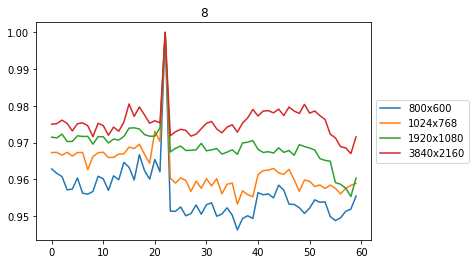

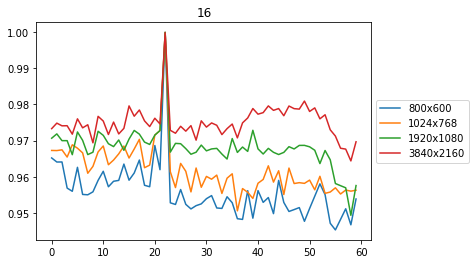

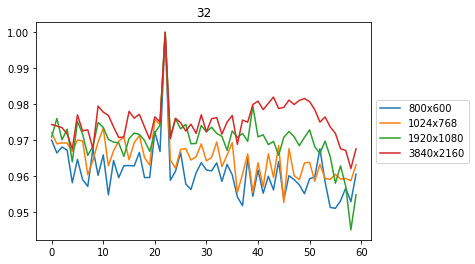

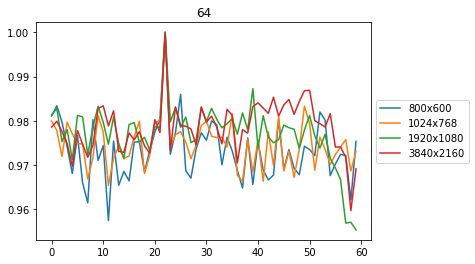

In [9]:
for t in tileSizes:
    plt.figure()
    for s in screenSizes:
        d = data[data['tile size']==t]
        d = d[d['screen size'].str.contains(s)]
        d = d.reset_index(drop=True)
        plt.title(str(t))
        d['% reuseable f1'].plot()
    
    plt.legend(screenSizes,loc='center left', bbox_to_anchor=(1, 0.5))

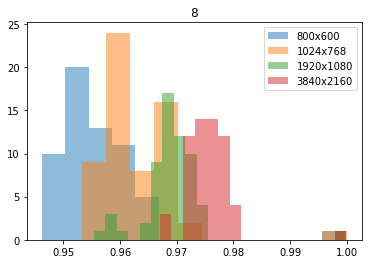

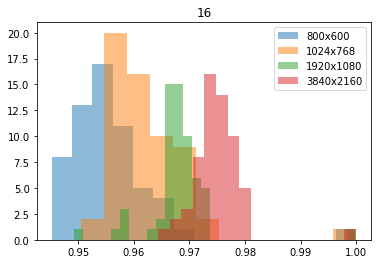

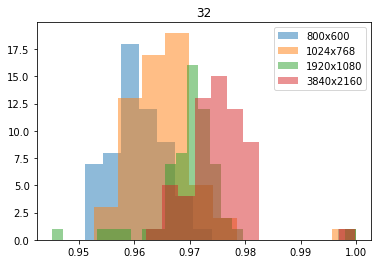

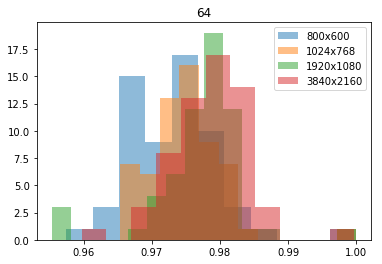

In [18]:
for t in tileSizes:
    plt.figure()
    for s in screenSizes:
        d = data[data['tile size']==t]
        d = d[d['screen size'].str.contains(s)]
        d = d.reset_index(drop=True)
        plt.title(str(t))
        
        plt.hist(d['% reuseable f1'],bins = 'auto',alpha=0.5,label=s)
    
    plt.legend()